In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Load the CSV file
df = pd.read_csv('retail_sales_dataset.csv' ) 
print("# Data Loaded Successfully!\n")

# Data Loaded Successfully!



In [5]:
# Display first 5 rows
print(df.head(11))

    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                1  2023-11-24     CUST001    Male   34           Beauty   
1                2  2023-02-27     CUST002  Female   26         Clothing   
2                3  2023-01-13     CUST003    Male   50      Electronics   
3                4  2023-05-21     CUST004    Male   37         Clothing   
4                5  2023-05-06     CUST005    Male   30           Beauty   
5                6  2023-04-25     CUST006  Female   45           Beauty   
6                7  2023-03-13     CUST007    Male   46         Clothing   
7                8  2023-02-22     CUST008    Male   30      Electronics   
8                9  2023-12-13     CUST009    Male   63      Electronics   
9               10  2023-10-07     CUST010  Female   52         Clothing   
10              11  2023-02-14     CUST011    Male   23         Clothing   

    Quantity  Price per Unit  Total Amount  
0          3              50           150

In [8]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])

# Create Month Column
df['Month'] = df['Date'].dt.to_period('M')





In [22]:
# ---- Analysis ----

# Total Revenue
total_revenue = df['Total Amount'].sum()
print(f"Total Revenue: ${total_revenue}")



Total Revenue: $456000


In [23]:
# Average Order Value
aov = df['Total Amount'].mean()
print(f"Average Order Value: ${aov:.2f}")



Average Order Value: $456.00


In [24]:
# Revenue by Gender
revenue_by_gender = df.groupby('Gender')['Total Amount'].sum()
print("\nRevenue by Gender:\n", revenue_by_gender)




Revenue by Gender:
 Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [25]:
# Revenue by Product Category
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum()
print("\nRevenue by Product Category:\n", revenue_by_category)




Revenue by Product Category:
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


In [26]:
# Revenue by Age Group
revenue_by_age = df.groupby('Age Group')['Total Amount'].sum()
print("\nRevenue by Age Group:\n", revenue_by_age)




Revenue by Age Group:
 Age Group
18-25     84550
26-35     98480
36-50    139660
51-65    133310
Name: Total Amount, dtype: int64


In [27]:
# Monthly Sales
monthly_sales = df.groupby('Month')['Total Amount'].sum()
print("\nMonthly Sales:\n", monthly_sales)


Monthly Sales:
 Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

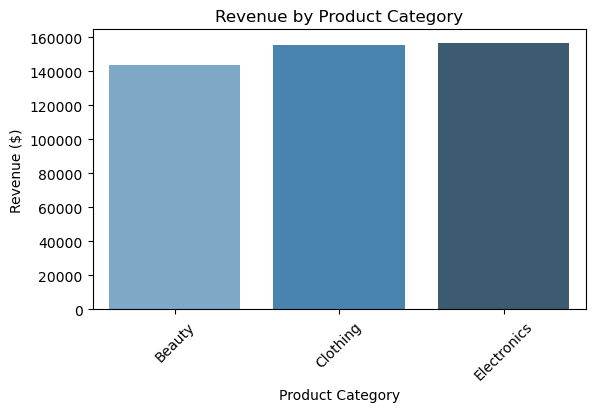

In [14]:
# ---- Visualization ----
plt.figure(figsize=(14, 8))

# Bar - Revenue by Product Category
plt.subplot(2, 2, 1)
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='Blues_d')
plt.title('Revenue by Product Category')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)



Text(0.5, 1.0, 'Revenue Share by Gender')

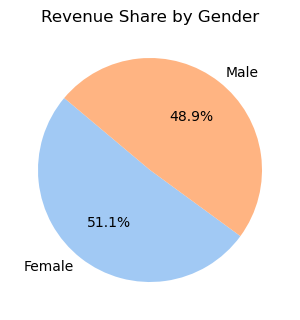

In [18]:
# Pie - Revenue by Gender
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 2)
plt.pie(revenue_by_gender.values, labels=revenue_by_gender.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Share by Gender')



Text(0, 0.5, 'Revenue ($)')

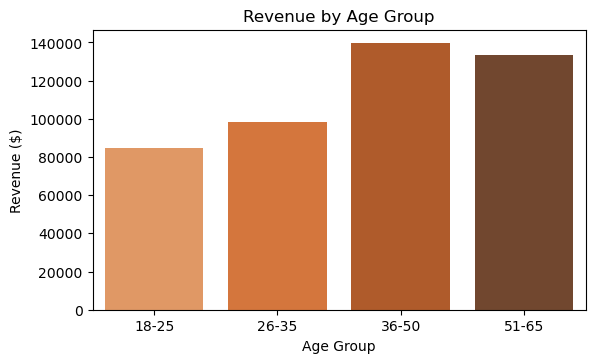

In [19]:
# Bar - Revenue by Age Group
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 3)
sns.barplot(x=revenue_by_age.index, y=revenue_by_age.values, palette='Oranges_d')
plt.title('Revenue by Age Group')
plt.ylabel('Revenue ($)')



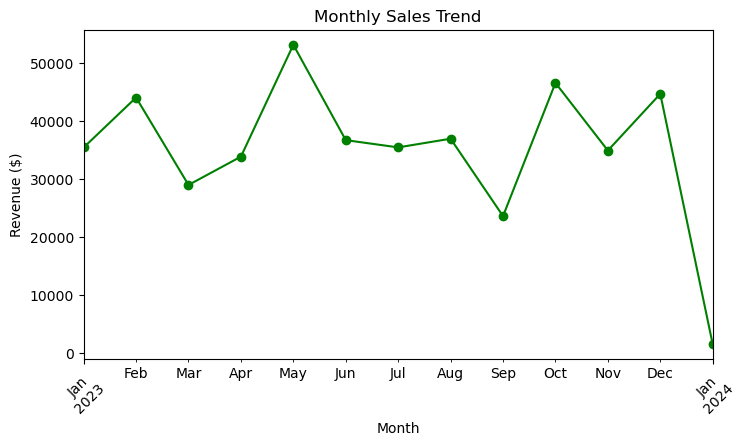

In [20]:
# Line - Monthly Sales Trend
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 4)
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()